In [ ]:
import numpy as np # Fundamental package for linear algebra and multidimensional arrays
import pandas as pd # Data analysis and manipulation tool
from sklearn import preprocessing 
from sklearn.tree import DecisionTreeClassifier
# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# In read_csv() function, we have passed the location to where the files are located in the dphi official github page.
train_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/connect-4/train_set_label.csv")

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50667 entries, 0 to 50666
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   a1      50667 non-null  object
 1   a2      50667 non-null  object
 2   a3      50667 non-null  object
 3   a4      50667 non-null  object
 4   a5      50667 non-null  object
 5   a6      50667 non-null  object
 6   b1      50667 non-null  object
 7   b2      50667 non-null  object
 8   b3      50667 non-null  object
 9   b4      50667 non-null  object
 10  b5      50667 non-null  object
 11  b6      50667 non-null  object
 12  c1      50667 non-null  object
 13  c2      50667 non-null  object
 14  c3      50667 non-null  object
 15  c4      50667 non-null  object
 16  c5      50667 non-null  object
 17  c6      50667 non-null  object
 18  d1      50667 non-null  object
 19  d2      50667 non-null  object
 20  d3      50667 non-null  object
 21  d4      50667 non-null  object
 22  d5      50667 non-null

In [ ]:
train_data.head()

,a1,a2,a3,a4,a5,a6,b1,b2,b3,b4,b5,b6,c1,c2,c3,c4,c5,c6,d1,d2,d3,d4,d5,d6,e1,e2,e3,e4,e5,e6,f1,f2,f3,f4,f5,f6,g1,g2,g3,g4,g5,g6,class
0,b,b,b,b,b,b,o,o,x,b,b,b,x,x,o,x,b,b,b,b,b,b,b,b,o,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,loss
1,b,b,b,b,b,b,o,b,b,b,b,b,x,o,o,b,b,b,x,b,b,b,b,b,x,x,b,b,b,b,o,b,b,b,b,b,b,b,b,b,b,b,loss
2,x,x,o,b,b,b,o,b,b,b,b,b,b,b,b,b,b,b,o,x,x,o,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,win
3,x,x,b,b,b,b,o,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,o,b,b,b,b,b,o,x,o,x,b,b,win
4,x,x,o,o,b,b,o,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,o,x,x,b,b,b,b,b,b,b,b,b,win


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data['class'] = le.fit_transform(train_data['class'])

In [ ]:
train_data

,a1,a2,a3,a4,a5,a6,b1,b2,b3,b4,b5,b6,c1,c2,c3,c4,c5,c6,d1,d2,d3,d4,d5,d6,e1,e2,e3,e4,e5,e6,f1,f2,f3,f4,f5,f6,g1,g2,g3,g4,g5,g6,class
0,b,b,b,b,b,b,o,o,x,b,b,b,x,x,o,x,b,b,b,b,b,b,b,b,o,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,1
1,b,b,b,b,b,b,o,b,b,b,b,b,x,o,o,b,b,b,x,b,b,b,b,b,x,x,b,b,b,b,o,b,b,b,b,b,b,b,b,b,b,b,1
2,x,x,o,b,b,b,o,b,b,b,b,b,b,b,b,b,b,b,o,x,x,o,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,2
3,x,x,b,b,b,b,o,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,o,b,b,b,b,b,o,x,o,x,b,b,2
4,x,x,o,o,b,b,o,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,o,x,x,b,b,b,b,b,b,b,b,b,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50662,x,o,o,b,b,b,b,b,b,b,b,b,x,x,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,o,b,b,b,b,b,x,o,b,b,b,b,2
50663,x,b,b,b,b,b,o,x,o,o,b,b,b,b,b,b,b,b,x,b,b,b,b,b,b,b,b,b,b,b,o,b,b,b,b,b,x,b,b,b,b,b,2
50664,x,x,o,o,b,b,o,x,x,o,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,1
50665,o,o,x,o,b,b,b,b,b,b,b,b,x,b,b,b,b,b,o,x,b,b,b,b,x,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,2


In [ ]:

train_data['class'].value_counts()

2    33354
1    12476
0     4837
Name: class, dtype: int64

In [ ]:
def print_unique_col_values(train_data):
  for column in train_data:
    if train_data[column].dtypes=='object':     
      le = LabelEncoder()
      
      train_data[column] = le.fit_transform(train_data[column])
    
      print(f'{column}: {train_data[column].unique()}')

In [ ]:
print_unique_col_values(train_data)

a1: [0 2 1]
a2: [0 2 1]
a3: [0 1 2]
a4: [0 1 2]
a5: [0 1 2]
a6: [0 1 2]
b1: [1 0 2]
b2: [1 0 2]
b3: [2 0 1]
b4: [0 1 2]
b5: [0 1 2]
b6: [0 2 1]
c1: [2 0 1]
c2: [2 1 0]
c3: [1 0 2]
c4: [2 0 1]
c5: [0 2 1]
c6: [0 1 2]
d1: [0 2 1]
d2: [0 2 1]
d3: [0 2 1]
d4: [0 1 2]
d5: [0 2 1]
d6: [0 1 2]
e1: [1 2 0]
e2: [0 2 1]
e3: [0 1 2]
e4: [0 1 2]
e5: [0 1 2]
e6: [0 1 2]
f1: [0 1 2]
f2: [0 2 1]
f3: [0 2 1]
f4: [0 1 2]
f5: [0 1 2]
f6: [0 2 1]
g1: [0 1 2]
g2: [0 2 1]
g3: [0 1 2]
g4: [0 2 1]
g5: [0 2 1]
g6: [0 1 2]


In [ ]:
cols_to_scale = ['a1','a2','a3','a4','a5','a6','b1','b2','b3','b4','b5','b6','c1','c2','c3','c4','c5','c6','d1','d2','d3','d4','d5','d6','e1','e2',
'e3','e4','e5','e6','f1','f2','f3','f4','f5','f6','g1','g2','g3','g4','g5','g6']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
 
# scaler =preprocessing.StandardScaler() 
train_data[cols_to_scale] = scaler.fit_transform(train_data[cols_to_scale])

In [ ]:
train_data.head()

,a1,a2,a3,a4,a5,a6,b1,b2,b3,b4,b5,b6,c1,c2,c3,c4,c5,c6,d1,d2,d3,d4,d5,d6,e1,e2,e3,e4,e5,e6,f1,f2,f3,f4,f5,f6,g1,g2,g3,g4,g5,g6,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5,1.0,0.0,0.0,0.0,1.0,1.0,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1.0,0.5,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,1.0,1.0,0.5,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,1.0,1.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.5,1.0,0.5,1.0,0.0,0.0,2
4,1.0,1.0,0.5,0.5,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [ ]:
# Input/independent variables
X = train_data.drop('class', axis = 1) # here we are dropping the class feature as this is the target and 'X' is input features, the changes are not
# made inplace as we have not used 'inplace = True'

y = train_data['class'] # Output/Dependent variable

In [ ]:
X = pd.get_dummies(X)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm,y_sm = smote.fit_sample(X, y)


Class=1, n=33354 (33.333%)
Class=2, n=33354 (33.333%)
Class=0, n=33354 (33.333%)


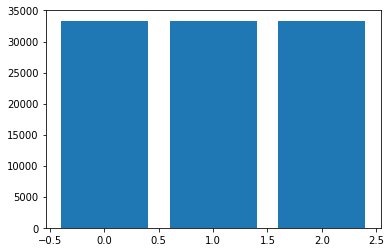

In [ ]:

# example of oversampling a multi-class classification dataset
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
# define the dataset location

data = train_data.values
# split into input and output elements
X_new, y = data[:, :-1], data[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()


In [ ]:
data = np.array(y)

In [ ]:
y = pd.DataFrame(data = y,  
                  columns =["class"]) 

In [ ]:
y.value_counts()

class
2        33354
1        33354
0        33354
dtype: int64

In [ ]:
# count_class_0, count_class_1,count_class_2 = y['class'].value_counts()

# # # Divide by class
# # df_class_0 = y[y['class'] == 0]
# # df_class_1 = y[y['class'] == 1]
# # df_class_2 = y[y['class'] == 2]

# print(count_class_2)
# print(count_class_1)
# print(count_class_0)

In [ ]:
# #  Divide by class
# df_class_0 = y[y['class'] == 0]
# df_class_1 = y[y['class'] == 1]
# df_class_2 = y[y['class'] == 2]

In [ ]:
data2 = np.array(X)


In [ ]:

X = pd.DataFrame(data = X,columns =['a1','a2','a3','a4','a5','a6','b1','b2','b3','b4','b5','b6','c1','c2','c3','c4','c5','c6','d1','d2','d3','d4','d5','d6','e1','e2',
'e3','e4','e5','e6','f1','f2','f3','f4','f5','f6','g1','g2','g3','g4','g5','g6']) 

In [ ]:
X.shape

(100062, 42)

In [ ]:
def unique_col_values(X):
  for column in X:
    # if test_data[column].dtypes=='object':     
    #   le = LabelEncoder()
      
      # test_data[column] = le.fit_transform(test_data[column])
      # max_thresold = X[column].quantile(0.95)
      # min_thresold = X[column].quantile(0.05)
      
      # X = X[(X[column]<max_thresold) & (X[column]>min_thresold)]
      min_thresold, max_thresold = X[column].quantile([0.001, 0.999])
      df2 = X[(X[column]<max_thresold) & (X[column]>min_thresold)]
      return df2





In [ ]:
Z = unique_col_values(X)

In [ ]:
Z.shape

(30152, 42)

In [ ]:
def print_unique_col(y):
  for column in y:
    # if test_data[column].dtypes=='object':     
    #   le = LabelEncoder()
      
      # test_data[column] = le.fit_transform(test_data[column])
      # max_thresold = X[column].quantile(0.95)
      # min_thresold = X[column].quantile(0.05)
      
      # X = X[(X[column]<max_thresold) & (X[column]>min_thresold)]
      min_thresold, max_thresold = y[column].quantile([0.001, 0.999])
      df3 = y[(y[column]<max_thresold) & (y[column]>min_thresold)]
    




In [ ]:
print_unique_col(y).shape


AttributeError: ignored

In [ ]:
df2.shape

NameError: ignored

In [ ]:
X['a1'].shape

(100062,)

In [ ]:
from sklearn.model_selection import train_test_split
# split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

# df2_train, df2_test, y_train, y_test = train_test_split(df2,y,test_size=0.2, random_state = 42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing 

In [ ]:
# import tensorflow as tf
# from tensorflow import keras
# import matplotlib.pyplot as plt
# %matplotlib inline
# import numpy as np

In [ ]:
X_train.shape

(80049, 42)

In [ ]:
from sklearn import svm

In [ ]:

# model.evaluate(X_test, y_test)

In [ ]:
# # import mean squared error from sklearn.metric
# from sklearn.metrics import f1_score
# yp = model.predict(X_test)
# print('Weighted F1 Score is: ', f1_score(y_test, yp, average='weighted'))

# # y_val is the original target value of the validation set (X_val)
# # pred is the predicted target value of the validation set

In [ ]:
import lightgbm
from sklearn.svm import SVC 

In [ ]:
RF = RandomForestClassifier(n_estimators=30)
# RF = lgm=lightgbm.LGBMClassifier()


In [ ]:
RF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Predicting that on X_test
pred = RF.predict(X_test)

In [ ]:

pred[:20]

array([2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 1, 2, 2, 1, 0, 2, 2, 2, 0])

In [ ]:
# import mean squared error from sklearn.metric
from sklearn.metrics import f1_score,accuracy_score

In [ ]:
print('Weighted F1 Score is: ', f1_score(y_test, pred, average='weighted'))

# y_val is the original target value of the validation set (X_val)
# pred is the predicted target value of the validation set

Weighted F1 Score is:  0.915471900100844


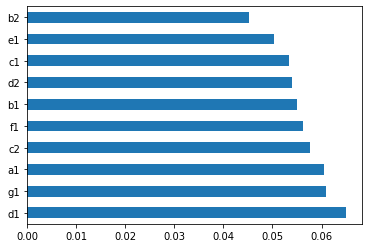

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Create a random forest classifier
rf_clf = RandomForestClassifier(n_estimators=50, random_state=1, n_jobs=-1)

# n_estimators = The number of trees in the forest.
# n_jobs = -1 : Use all processors for training

# Train the classifier
rf_clf.fit(X_train, y_train)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(rf_clf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/connect-4/test_set_label.csv')

In [ ]:
test_data.head()

,a1,a2,a3,a4,a5,a6,b1,b2,b3,b4,b5,b6,c1,c2,c3,c4,c5,c6,d1,d2,d3,d4,d5,d6,e1,e2,e3,e4,e5,e6,f1,f2,f3,f4,f5,f6,g1,g2,g3,g4,g5,g6
0,b,b,b,b,b,b,b,b,b,b,b,b,x,o,b,b,b,b,o,b,b,b,b,b,b,b,b,b,b,b,x,o,b,b,b,b,x,x,o,b,b,b
1,b,b,b,b,b,b,x,o,o,o,x,b,x,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,o,b,b,b,b,b,x,b,b,b,b,b
2,x,x,o,b,b,b,x,o,b,b,b,b,o,x,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,o,b,b,b,b,b
3,b,b,b,b,b,b,x,o,o,b,b,b,x,o,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,o,x,x,b,b,b
4,x,o,b,b,b,b,b,b,b,b,b,b,o,b,b,b,b,b,o,x,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,x,x,o,b,b,b


In [ ]:
def print_unique_col_values(test_data):
  for column in test_data:
    if test_data[column].dtypes=='object':     
      le = LabelEncoder()
      
      test_data[column] = le.fit_transform(test_data[column])
    
      print(f'{column}: {test_data[column].unique()}')

In [ ]:
print_unique_col_values(test_data)

a1: [0 2 1]
a2: [0 2 1]
a3: [0 1 2]
a4: [0 1 2]
a5: [0 1 2]
a6: [0 1 2]
b1: [0 2 1]
b2: [0 1 2]
b3: [0 1 2]
b4: [0 1 2]
b5: [0 2 1]
b6: [0 2 1]
c1: [2 1 0]
c2: [1 0 2]
c3: [0 2 1]
c4: [0 2 1]
c5: [0 2 1]
c6: [0 1 2]
d1: [1 0 2]
d2: [0 2 1]
d3: [0 2 1]
d4: [0 2 1]
d5: [0 1 2]
d6: [0 2 1]
e1: [0 2 1]
e2: [0 1 2]
e3: [0 1 2]
e4: [0 2 1]
e5: [0 1 2]
e6: [0 1 2]
f1: [2 1 0]
f2: [1 0 2]
f3: [0 1 2]
f4: [0 1 2]
f5: [0 1 2]
f6: [0 2 1]
g1: [2 1 0]
g2: [2 0 1]
g3: [1 0 2]
g4: [0 2 1]
g5: [0 1 2]
g6: [0 1 2]


In [ ]:
cols_to_scale = ['a1','a2','a3','a4','a5','a6','b1','b2','b3','b4','b5','b6','c1','c2','c3','c4','c5','c6','d1','d2','d3','d4','d5','d6','e1','e2',
'e3','e4','e5','e6','f1','f2','f3','f4','f5','f6','g1','g2','g3','g4','g5','g6']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
test_data[cols_to_scale] = scaler.fit_transform(test_data[cols_to_scale])

In [ ]:
test_data.head()

,a1,a2,a3,a4,a5,a6,b1,b2,b3,b4,b5,b6,c1,c2,c3,c4,c5,c6,d1,d2,d3,d4,d5,d6,e1,e2,e3,e4,e5,e6,f1,f2,f3,f4,f5,f6,g1,g2,g3,g4,g5,g6
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.0,0.0,0.0,1.0,1.0,0.5,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5,0.5,0.5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.5,0.0,0.0,0.0,1.0,0.5,0.0,0.0,0.0,0.0,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5,0.5,0.0,0.0,0.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,1.0,0.0,0.0,0.0
4,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.5,0.0,0.0,0.0


In [ ]:
target = RF.predict(test_data)


In [ ]:
target

array([1, 1, 2, ..., 2, 2, 2])

In [ ]:
target = le.inverse_transform(target)

In [ ]:
target

array(['loss', 'loss', 'win', ..., 'win', 'win', 'win'], dtype=object)

In [ ]:
res = pd.DataFrame(target) # target are nothing but the final predictions of your model on input features of your new unseen test data
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('submission.csv', index = False)
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>